<a href="https://colab.research.google.com/github/Yasminebenhamadi/NMA/blob/main/EM_demo/yasmine/EM_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

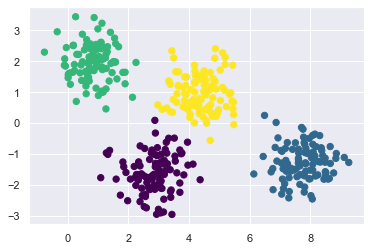

In [ ]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)#+[np.random.randint(1,39) for i in range(400)]


plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

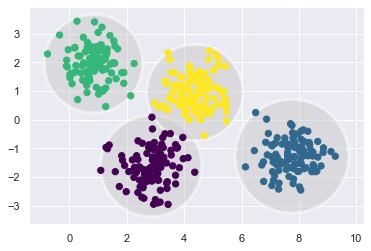

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

# check from here

In [ ]:
#generate random sample for normal distrubutions with those means and covariences 

mean = [1,2,2]
cov = [[1, 0,3], [0, 1,3],[2,3,4]]
x = np.random.multivariate_normal(mean, cov,size=30)
mean = [9,7,5]
cov = [[6, 0,9], [-5, 0,3],[2,3,4]]
x2=np.random.multivariate_normal(mean, cov,size=30)
pts=x
#concatane the two samples 
data=np.concatenate((x,x2))



<ipython-input-173-a0660b870451>:3: RuntimeWarning: covariance is not positive-semidefinite.
  x = np.random.multivariate_normal(mean, cov,size=30)
<ipython-input-173-a0660b870451>:6: RuntimeWarning: covariance is not positive-semidefinite.
  x2=np.random.multivariate_normal(mean, cov,size=30)


In [ ]:
#this function is for changing the index i don't think it s necessary
np.random.shuffle(data)


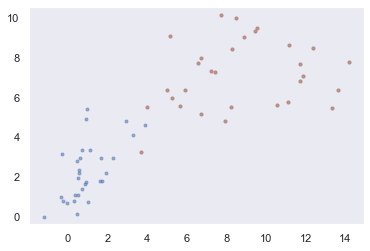

In [ ]:

#the plot of the fiest sample and the second sample on 2d 
import matplotlib.pyplot as plt

plt.plot(data[:, 0], data[:, 1], '.', alpha=0.5)
#plt.plot(x[:, 0], x[:, 1], '.', alpha=0.5)
plt.plot(x2[:, 0], x2[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(2, covariance_type='full', random_state=0,max_iter=)
gmm.fit(data)
print(gmm.converged_)
print('means',gmm.means_)
print('cov',gmm.covariances_)
labels=gmm.predict(data)



True
means [[1.100522   2.36014382 2.52826628]
 [8.87002017 7.29062989 5.41462612]]
cov [[[1.53403715 1.19224196 1.57975065]
  [1.19224196 2.20263231 1.8739025 ]
  [1.57975065 1.8739025  3.97736622]]

 [[7.87351442 0.37439233 2.10632656]
  [0.37439233 2.43663004 0.91912941]
  [2.10632656 0.91912941 8.35146966]]]


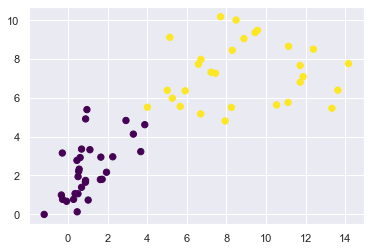

In [ ]:

plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');